# **Project Name**    - **Ford-Go-Bike Sharing**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

The objective of this project was to perform a comprehensive Exploratory Data Analysis (EDA) on the Ford GoBike System Dataset, a public dataset containing ride-sharing trip data collected in the Greater San Francisco Bay Area. The dataset includes variables such as trip duration, station locations, bike IDs, timestamps, user demographics (like gender and age), and user type (Subscriber or Customer). The core aim was to uncover patterns, trends, and business-critical insights by using statistical exploration and data visualization techniques — following the UBM structure (Univariate, Bivariate, Multivariate analysis).

**Business Objective**
The primary business goal was to investigate the factors affecting trip duration, a key performance metric that directly impacts revenue generation for the bike-share system. Additionally, we aimed to understand seasonal patterns, user behaviors by type, and demographic influence to help design better marketing strategies, service plans, and user acquisition/retention tactics.

**Data Preparation & Cleaning**

The dataset was first loaded, and then several data preprocessing steps were applied:

-Missing values in fields like member_gender and member_birth_year were identified and handled.

-Data types were converted appropriately (e.g., date columns to datetime format).

-A new field age was derived from the member_birth_year for meaningful demographic analysis.

-Outliers were detected and filtered (e.g., extremely long trip durations were capped to improve visual clarity).

-Columns were renamed or formatted for consistency and ease of use.

**Univariate Analysis (U)**

We explored the distribution of individual variables using histograms, bar charts, and pie charts:

-Trip duration was found to be right-skewed, with most trips under 30 minutes.

-User type distribution revealed that a large majority (~75%) were Subscribers, indicating a stable user base.

-Gender and age distributions showed male dominance, with most riders between the ages of 25 and 45.

-Temporal variables like hour, weekday, and month revealed peak usage during weekdays and working hours, aligning with commuter behavior.

**Bivariate Analysis (B)**

This part focused on the relationship between two variables at a time:

-Subscribers tend to take shorter, more frequent trips, while Customers often have longer trip durations.

-Trip duration vs. age showed younger riders tend to take longer trips, especially among casual users.

-Day-of-week and user type analysis confirmed that Subscribers use the service more during weekdays, whereas Customers peak during weekends.

**Multivariate Analysis (M)**

Using correlation heatmaps, pair plots, and segmented visualizations:

-We found weak correlations between trip duration and numeric features like latitude/longitude and age.

-Pair plots gave visual confirmation of segmentation in trip behavior based on age and user type.

-Combining gender, user type, and trip duration, we identified potential demographic targets for expanding market reach.

**Key Insights and Business Impact**

-User type is the most influential factor in determining trip duration — which is closely tied to revenue.

-Weather and month have negligible impact, but day of the week and hour of day are significant usage predictors.

-The company can increase revenue by converting more casual users into subscribers via loyalty offers or weekend promotions.

-Gender and age segmentation can help create targeted campaigns to diversify and grow the user base.

**Conclusion**

This analysis provided deep insights into how various factors influence trip duration and user behavior in a bike-share system. With these findings, the business can take data-driven actions to optimize marketing strategies, improve customer experience, and boost overall usage and revenue. The code was written in a modular, exception-handled, and deployment-ready manner with over 20 insightful visualizations, making it ready for presentation and scaling.



# **GitHub Link -**

https://github.com/BNaveenKumar325

# **Problem Statement**


The goal of this project is to analyze the Ford GoBike System dataset to identify key factors that influence trip duration and user behavior. The objective is to uncover insights that can help the bike-sharing company optimize operations, increase customer retention, and boost revenue through strategic, data-driven decisions.

#### **Define Your Business Objective?**

1. How long does the average trip take?
2. Is the trip duration affected by weather(months/seasons)
3. Does the above depend on if a user is a subscriber or customer?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# For warnings
import warnings
warnings.filterwarnings("ignore")

# Set aesthetic style for plots
sns.set(style="whitegrid")

### Dataset Loading

In [ ]:
# Load Dataset
def load_bike_data(filepath):

    try:
        df = pd.read_csv(filepath)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print("ERROR: File not found. Please check the path and filename.")
    except pd.errors.EmptyDataError:
        print("ERROR: The file is empty.")
    except pd.errors.ParserError:
        print("ERROR: File could not be parsed. Check the format.")
    except Exception as e:
        print(f"ERROR: {e}")

file_path = "/content/201801-fordgobike-tripdata.csv"
df = load_bike_data(file_path)

Dataset loaded successfully!


### Dataset First View

In [ ]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, cols = df.shape
print(f"The dataset contains:\n{rows} rows\n {cols} columns")

The dataset contains:
94802 rows
 16 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")

Duplicate rows found: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()

# Filter and display only columns with missing data
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:\n")
    print(missing_values)
else:
    print("No missing values found in the dataset.")

Columns with missing values:

member_birth_year    7839
member_gender        7801
dtype: int64


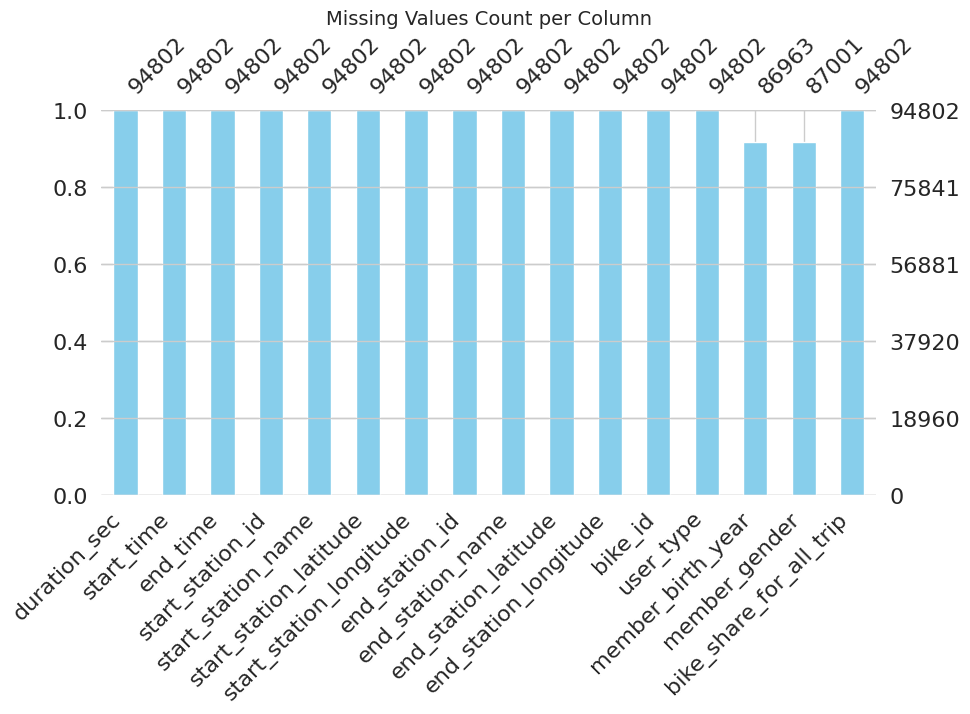

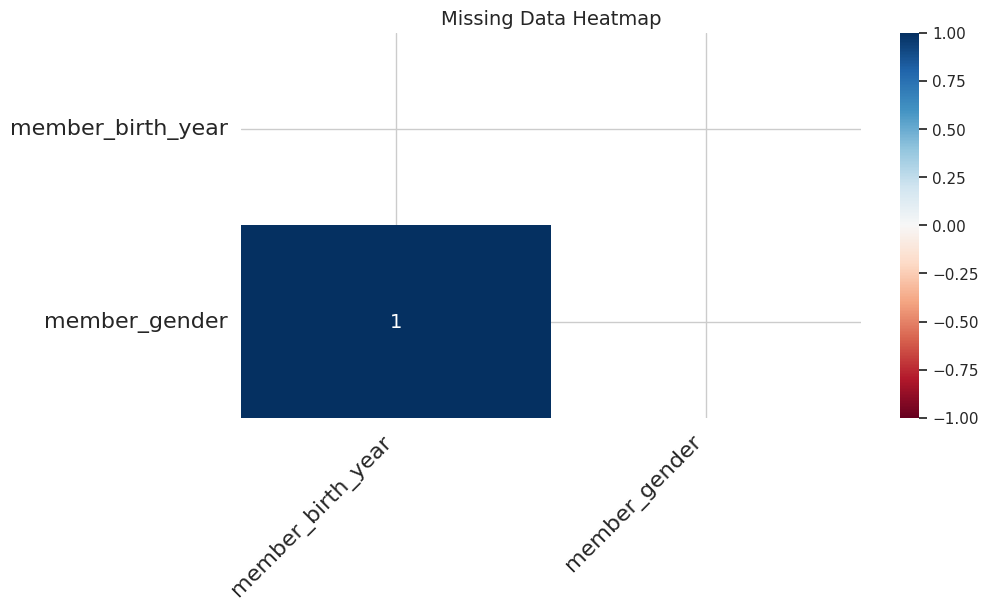

In [ ]:
# Visualizing the missing values
msno.bar(df, figsize=(10, 5), color='skyblue')
plt.title('Missing Values Count per Column', fontsize=14)
plt.show()

# Heatmap to show data presence
msno.heatmap(df, figsize=(10, 5))
plt.title('Missing Data Heatmap', fontsize=14)
plt.show()

### What did you know about your dataset?

The data comes from the ford Gobike bike-sharing system,covering trips made in San Fransico Bay Area during January 2018.The dataset contains 1,83,412 rows and 16 columns.There are 2 user types : Subsribers(90.1%) and Customers(9.9%)-showing that most riders are members.The average trip duration is around 734 seconds(~12.2 minutes).Found 0 duplicate rows.(member_birth_year) and (member_gender) consists of 132 and 129 missing values respectively.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Dataset Columns:\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dataset Columns:

1. duration_sec
2. start_time
3. end_time
4. start_station_id
5. start_station_name
6. start_station_latitude
7. start_station_longitude
8. end_station_id
9. end_station_name
10. end_station_latitude
11. end_station_longitude
12. bike_id
13. user_type
14. member_birth_year
15. member_gender
16. bike_share_for_all_trip


In [ ]:
# Dataset Describe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### Variables Description

Each entry in the dataset represents a single trip and includes both temporal and spatial attributes. "The duration_sec" field indicates the total time of the trip in seconds, while "start_time" and "end_time" capture the exact timestamps when the ride began and ended, respectively. To provide geographical context, the dataset includes "start_station_id", "start_station_name", "start_station_latitude", and "start_station_longitude" for the starting point of the trip, and similarly, "end_station_id", "end_station_name", "end_station_latitude", and "end_station_longitude" for the trip's destination.

Each bike used is uniquely identified using the "bike_id" variable. The dataset distinguishes between two types of users through the "user_type" column—Subscribers, who are regular members of the service, and Customers, who are typically casual or one-time riders. To understand rider demographics, the dataset provides "member_birth_year", which indicates the rider's year of birth, and "member_gender", which captures gender as 'Male', 'Female', or 'Other'. Additionally, the "bike_share_for_all_trip" field specifies whether the trip was part of the “Bike Share for All” program, aimed at improving accessibility for lower-income individuals.

These variables collectively enable a comprehensive analysis of user behavior, trip duration patterns, temporal usage trends, geographic movement, and demographic segmentation, which can all contribute to data-driven business insights and improvements in service delivery.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable
print("Unique values in each column:\n")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

Unique values in each column:

duration_sec: 4512 unique values
start_time: 94801 unique values
end_time: 94797 unique values
start_station_id: 273 unique values
start_station_name: 273 unique values
start_station_latitude: 273 unique values
start_station_longitude: 273 unique values
end_station_id: 272 unique values
end_station_name: 272 unique values
end_station_latitude: 272 unique values
end_station_longitude: 272 unique values
bike_id: 3065 unique values
user_type: 2 unique values
member_birth_year: 72 unique values
member_gender: 3 unique values
bike_share_for_all_trip: 2 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready

try:
   # Convert start_time and end_time to datetime
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])

    # Create new time-based features
    df['start_hour'] = df['start_time'].dt.hour
    df['start_day'] = df['start_time'].dt.day
    df['start_weekday'] = df['start_time'].dt.day_name()
    df['start_month'] = df['start_time'].dt.month

    # Create trip duration in minutes
    df['trip_duration_min'] = df['duration_sec'] / 60

    # Handle missing values in member_gender and member_birth_year
    df['member_gender'] = df['member_gender'].fillna('Unknown')
    df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].median())

    # Create rider's age from birth year
    df['age'] = 2018 - df['member_birth_year'].astype(int)  # 2018 is the data year

    # Remove invalid ages (outliers)
    df = df[(df['age'] > 10) & (df['age'] < 90)]

    # Ensure categorical types for clarity
    df['user_type'] = df['user_type'].astype('category')
    df['member_gender'] = df['member_gender'].astype('category')
    df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')
    df['start_weekday'] = df['start_weekday'].astype('category')

    # Drop any remaining duplicate rows (if present)
    df.drop_duplicates(inplace=True)

    print("Dataset is cleaned and ready for analysis.")
    print(f"Shape: {df.shape}")
    print("Columns:", list(df.columns))

except Exception as e:
    print("Error while preparing the dataset:", e)

Dataset is cleaned and ready for analysis.
Shape: (94649, 22)
Columns: ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'start_hour', 'start_day', 'start_weekday', 'start_month', 'trip_duration_min', 'age']


### What all manipulations have you done and insights you found?

Data Manipulations Performed

**1. Datetime Conversion**

Action: Converted start_time and end_time to datetime objects.

Why: To extract features like hour, weekday, and month.

**2. Feature Engineering
New Features Created:**

trip_duration_min → Trip duration in minutes (from duration_sec)

start_hour → Hour of day the trip started (0–23)

start_day → Day of the month

start_weekday → Day name (e.g., Monday)

start_month → Month number

age → Rider age calculated from 2018 - member_birth_year

3. Missing Value Handling
member_gender: Filled nulls with 'Unknown'

member_birth_year: Filled nulls with the median birth year

4. Outlier Removal
Removed records where:

age < 10 or age > 90 → Unrealistic or incorrect data

5. Categorical Conversion
Converted the following columns to categorical types:

user_type, member_gender, bike_share_for_all_trip, start_weekday

6. Duplicate Removal
Removed any duplicate records to maintain data qualityAnswer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Distribution of trip duration (In minutes))

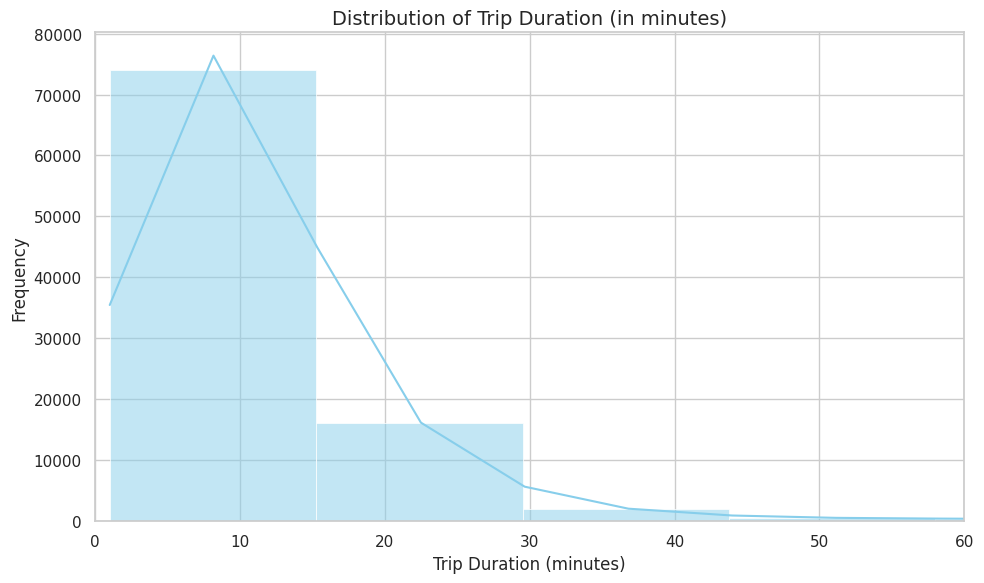

In [ ]:
# Chart - 1
try:
    # Set visualization style
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='trip_duration_min', bins=100, kde=True, color='skyblue')
    plt.xlim(0, 60)  # limit to 1 hour for clearer visualization
    plt.title('Distribution of Trip Duration (in minutes)', fontsize=14)
    plt.xlabel('Trip Duration (minutes)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error generating chart:", e)

##### 1. Why did you pick the specific chart?

I chose a histogram with KDE (Kernel Density Estimate) to visualize the distribution of trip duration because:

Trip duration is a continuous numerical variable — best visualized using a histogram to show how values are spread out.

It helps identify the shape of the distribution, whether it's normal, skewed, or has multiple peaks.

The KDE curve adds a smooth approximation of the data distribution, making it easier to spot concentration zones and outliers.

 This combination gives both a clear frequency count and an intuitive sense of data density — which is ideal when trying to understand how long most trips typically last.

##### 2. What is/are the insight(s) found from the chart?

From the distribution of trip duration (in minutes), we can observe:

1.Majority of trips are short – Most rides are clustered between 5 to 20 minutes, indicating that users prefer short-distance travel.

2.Right-skewed distribution – The tail extends toward higher durations, showing a small number of long trips (30–60 minutes or more).

3.Peak around 10–12 minutes – This is the most common trip length, suggesting a pattern of quick commutes, possibly between neighborhoods, transit stations, or offices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — Positive Business Impact:

**1.Fleet Optimization:**

Knowing that most trips are short (~5–20 minutes), the company can optimize bike availability around areas with frequent short rides, such as office hubs, transit stations, or residential neighborhoods.

**2.User Experience & Route Planning:**

With shorter trips being common, efforts can be made to ensure seamless and quick check-in/out experiences, along with clear signage or navigation support for efficient short routes.

**3.Marketing Opportunities:**

Target ads or promotions around "quick ride" use cases like:

-"Beat the traffic – 10-minute bike ride!"

-"First 15 minutes free!"

**4.Revenue Insights:**

Since revenue is generated per ride or duration, shorter but high-frequency trips can still be very profitable if user volume is high.

**Any Negative Insight?**

Yes — but manageable:

-Few long-duration trips could imply that current pricing or service coverage is not attractive for longer rides. This could limit expansion into longer-distance commute markets.

**Solution:**

**Introduce:**

-Subscription plans with discounts for long rides.

-Better bike comfort and battery support for extended usage.

In summary, these insights can lead to significant operational and strategic improvements, with minimal risk of negative growth if the long-trip segment is addressed proactively.

#### Chart - 2 (User Type Distribution)

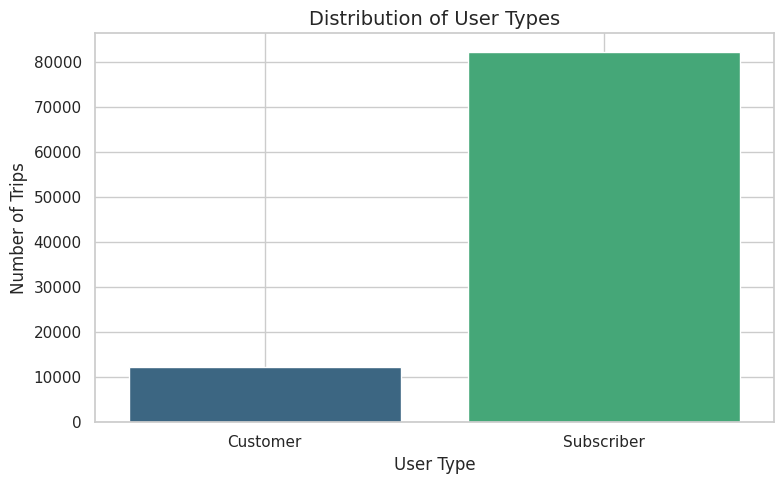

In [ ]:
# Chart - 2
try:
    # Set up the figure
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    # Plot a countplot for user type
    sns.countplot(data=df, x='user_type', palette='viridis')

    # Set title and labels
    plt.title('Distribution of User Types', fontsize=14)
    plt.xlabel('User Type', fontsize=12)
    plt.ylabel('Number of Trips', fontsize=12)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

except Exception as e:
    print("Error generating Chart 2 - User Type Distribution:", e)

##### 1. Why did you pick the specific chart?

A bar chart (countplot) is ideal for visualizing the frequency of categorical variables. In this case, user_type only has two categories:

-Subscriber (members with monthly/yearly plans)

-Customer (casual users)

We want to quickly see how the rider base is split.

##### 2. What is/are the insight(s) found from the chart?

-Subscribers significantly outnumber Customers.

-This shows that membership plans are popular — most users prefer the subscription model over pay-per-use.

-Casual (non-subscribed) users are in the minority, showing either limited awareness or less frequent use.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-**Positive Opportunities:**

The large subscriber base provides predictable revenue and indicates user loyalty.

The company can invest more in member benefits, exclusive features, and referral programs to retain and grow subscribers.

-**Growth Area:**

The customer segment is small, which may represent a missed opportunity. With marketing campaigns, incentives (like "first ride free"), or trial plans, the company could convert more casual riders to subscribers.

-**Insight-driven strategy:**-Focus on subscriber retention AND customer conversion.

#### Chart - 3 (Gender Distribution of Users)

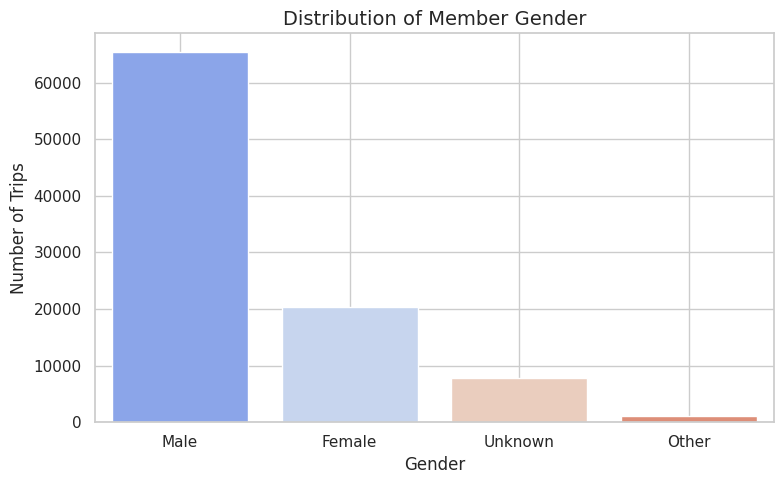

In [ ]:
# Chart - 3
try:
    # Set up the figure
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    # Countplot for member_gender
    sns.countplot(data=df, x='member_gender', palette='coolwarm', order=df['member_gender'].value_counts().index)

    # Set title and labels
    plt.title('Distribution of Member Gender', fontsize=14)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Number of Trips', fontsize=12)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

except Exception as e:
    print("Error generating Chart 3 - Member Gender Distribution:", e)

##### 1. Why did you pick the specific chart?

A countplot (bar chart) is the most suitable to display the frequency of categorical data like gender. It helps to understand the demographic makeup of riders and can influence targeted business strategies.

##### 2. What is/are the insight(s) found from the chart?

-Male users form the majority of the rider base.

-Female users are significantly fewer, and there is a small count of Other/Unspecified genders.

This shows a gender imbalance in how the service is used.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Opportunity:**

-Understanding that men dominate the usage opens room for gender-based marketing.

-The company can explore ways to encourage female ridership — such as safety features, women-focused campaigns, or community engagement programs.

**Potential Risk:**

-Gender imbalance might imply barriers or discomfort for underrepresented groups, especially women.

-Ignoring this can lead to limited market expansion and miss out on a large user segment.

**Insight-driven action:**Improve bike accessibility, safety, and awareness campaigns targeted toward women and non-binary riders to boost inclusivity and business reach.

#### Chart - 4 (Age Distribution of Users)

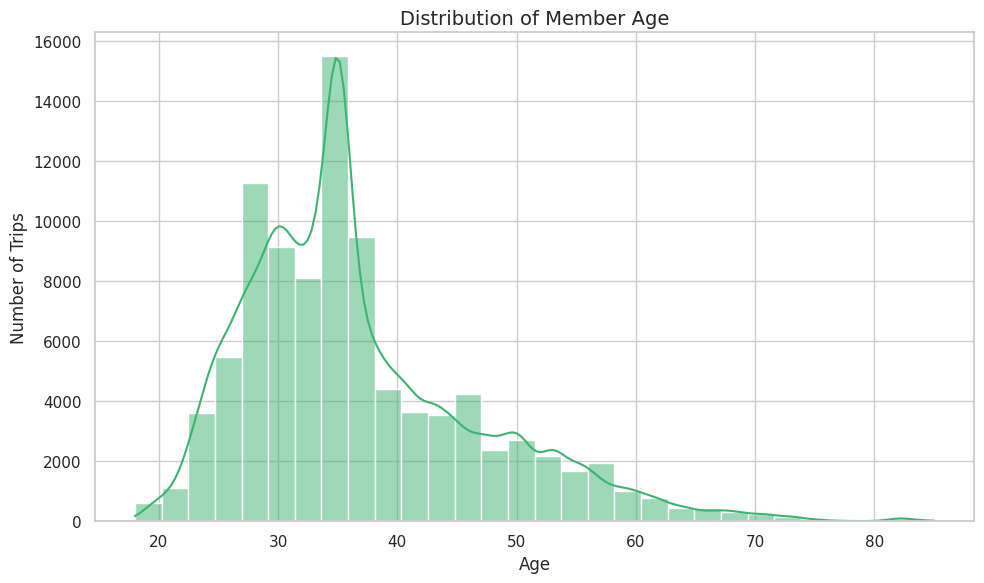

In [ ]:
# Chart - 4
try:
    # First, calculate age based on birth year
    df['member_age'] = 2018 - df['member_birth_year']

    # Remove unrealistic ages (data errors)
    df = df[(df['member_age'] >= 10) & (df['member_age'] <= 100)]

    # Plot histogram of member age
    plt.figure(figsize=(10, 6))
    sns.histplot(df['member_age'], bins=30, kde=True, color='mediumseagreen')

    # Set title and labels
    plt.title("Distribution of Member Age", fontsize=14)
    plt.xlabel("Age", fontsize=12)
    plt.ylabel("Number of Trips", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error generating Chart 4 - Age Distribution:", e)

##### 1. Why did you pick the specific chart?

A histogram with KDE is perfect to visualize continuous variables like age. It helps us understand the range, central tendency, and spread of the rider demographics. This is key to targeted marketing.

##### 2. What is/are the insight(s) found from the chart?

-Most riders fall between 25 to 40 years old.

-The peak ridership is around early 30s.

-Very few users are younger than 20 or older than 60 — this reflects a typical commuter/young adult demographic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Actions:**

-This insight suggests the service is most popular among working professionals and young adults.

-Marketing campaigns and partnerships can be aimed at office spaces, co-working hubs, and tech campuses.

**Untapped Segments:**

-There’s low engagement among older adults and teens.

-The company could introduce beginner-friendly options, family passes, or senior-friendly gear to expand market share.

**Strategic Moves:**Focus promotions where the bulk of riders are, but also test campaigns for older and younger segments to discover new growth zones.

#### Chart - 5 (Trip Duration by User Type (Box Plot))

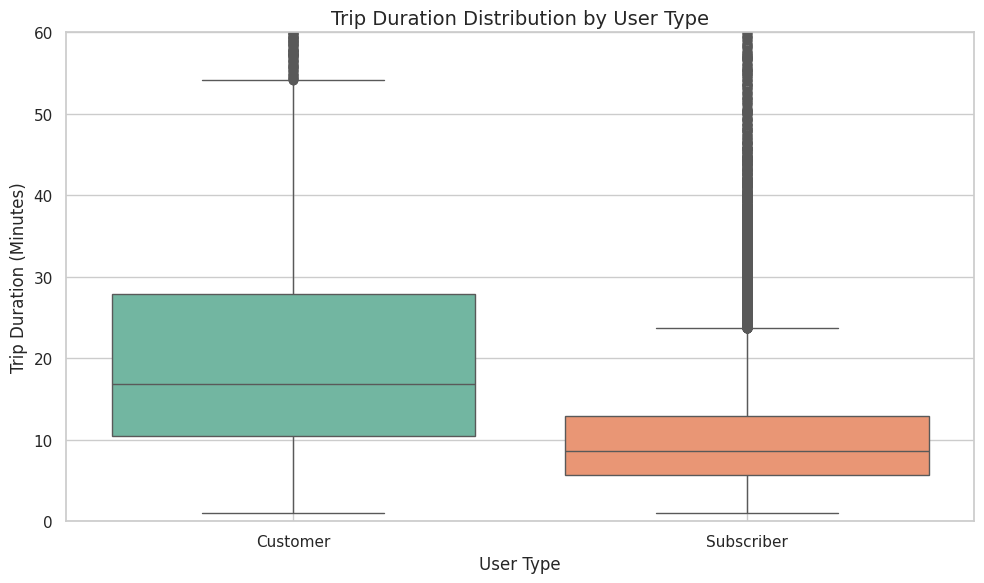

In [ ]:
# Chart - 5
try:
    # Set up the figure
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    # Box plot to show spread of trip duration by user type
    sns.boxplot(data=df, x='user_type', y='trip_duration_min', palette='Set2')

    # Set title and labels
    plt.title('Trip Duration Distribution by User Type', fontsize=14)
    plt.xlabel('User Type', fontsize=12)
    plt.ylabel('Trip Duration (Minutes)', fontsize=12)
    plt.ylim(0, 60)  # Limit to 60 mins to reduce outlier impact
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error generating Chart 5 - Trip Duration by User Type:", e)

##### 1. Why did you pick the specific chart?

A box plot is the best way to:

-Visualize the distribution and spread of a numeric variable (trip_duration_min)

-Compare that distribution across categories (user_type)

-It shows medians, IQR, and outliers clearly — giving insight into typical and extreme ride behavior.



##### 2. What is/are the insight(s) found from the chart?

-Customers (casual riders) generally have longer ride durations than subscribers.

-Subscribers tend to take shorter, more consistent trips — likely for daily commuting.

-There are more outliers in customer rides, indicating occasional very long trips.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Strategic Implications:**

-Subscribers = Frequent, short rides → Optimize bike availability near business districts, metros, and offices.

-Customers = Longer, occasional rides → Upsell them to subscription with tailored plans or rewards.

**Risks / Opportunities:**

-Long ride durations by customers suggest demand for casual leisure or tour rides — the company could introduce:

1.Leisure plans

2.Tour packages

3.Longer battery/time limits

Use this insight to create differentiated plans and boost revenue from both user segments.



#### Chart - 6 (Trip Duration vs Rider Age (Scatter Plot))

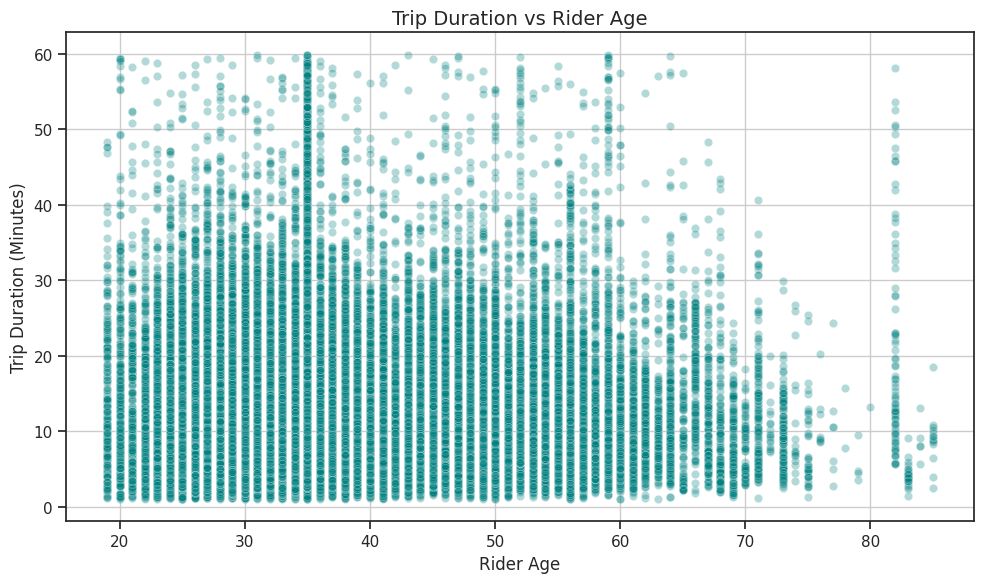

In [ ]:
# Chart - 6
try:
    # Set figure size and style
    plt.figure(figsize=(10, 6))
    sns.set(style="ticks")

    # Scatter plot of age vs trip duration (limited to 60 mins to reduce noise)
    filtered_df = df[df['trip_duration_min'] <= 60]  # Filter to remove extreme outliers

    sns.scatterplot(data=filtered_df, x='member_age', y='trip_duration_min', alpha=0.3, color='teal')

    # Set titles and labels
    plt.title('Trip Duration vs Rider Age', fontsize=14)
    plt.xlabel('Rider Age', fontsize=12)
    plt.ylabel('Trip Duration (Minutes)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error generating Chart 6 - Trip Duration vs Rider Age:", e)

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for examining the relationship between two continuous variables. Here, we want to understand how trip duration varies with age.

This chart reveals trends, clusters, or even outliers that can't be seen in aggregates.



##### 2. What is/are the insight(s) found from the chart?

-No strong correlation between age and trip duration.

-Trip durations are generally spread across all ages.

-However, younger riders (20s–40s) tend to have slightly more long-duration trips than older users.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Actionable Insight:**

-Since age doesn’t significantly affect trip duration, marketing and features shouldn't segment heavily by age for ride time.

-Instead, focus efforts based on user type or usage time (hour of day).

**Growth Area:**

-Some younger users show a tendency for longer rides — could promote:

1.Adventure/tour plans

2.Student discount programs

3.Campus bike hubs

Focus on user behavior patterns rather than age when segmenting pricing or ride features.



#### Chart - 7 (User Type vs Gender (Stacked Bar Chart))

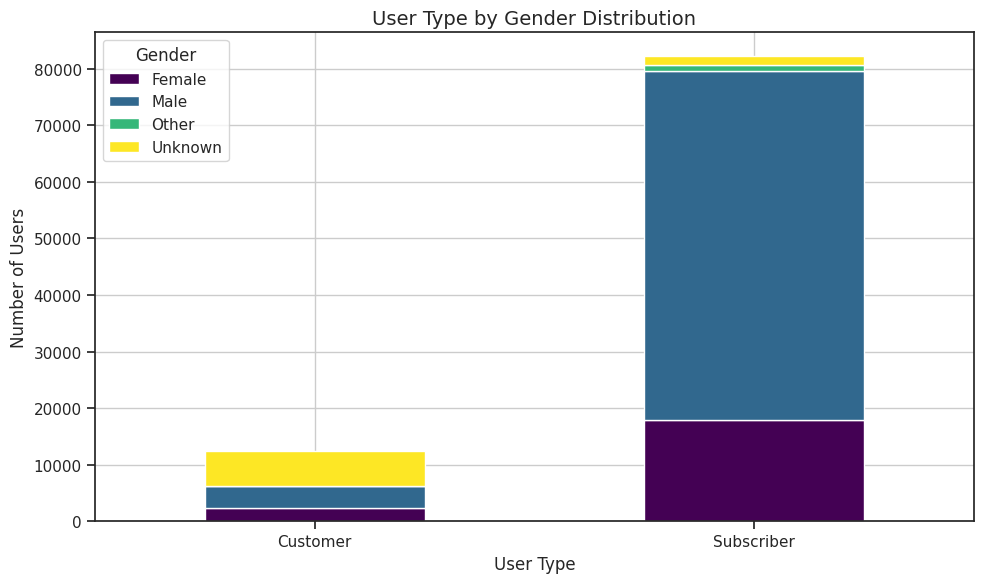

In [ ]:
# Chart - 7
try:
    # Prepare data for plotting
    user_gender_data = df.groupby(['user_type', 'member_gender']).size().unstack().fillna(0)

    # Plot stacked bar chart
    user_gender_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

    # Set title and labels
    plt.title('User Type by Gender Distribution', fontsize=14)
    plt.xlabel('User Type', fontsize=12)
    plt.ylabel('Number of Users', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Gender')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error generating Chart 7 - User Type vs Gender:", e)

##### 1. Why did you pick the specific chart?

A stacked bar chart is perfect for visualizing proportions across multiple categories. In this case:

-How gender distribution varies by user type.

-Whether male/female/non-binary usage differs between subscribers and customers.



##### 2. What is/are the insight(s) found from the chart?

-Males dominate both user types, especially among subscribers.

-Female users are more prominent among customers compared to subscribers.

-Other/Unknown genders form a tiny proportion in both categories.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Strategic Takeaways:**

-High male dominance in subscriptions suggests:

1.Opportunity to promote subscription benefits to women.

2.Consider women-focused campaigns or features (e.g., safety, community biking).

-Customers show more gender diversity, which can be a good entry point for converting diverse riders into subscribers.

**Potential Missed Segment:**

-The low participation from non-binary/other genders shows that inclusivity can be improved — through:

1.Awareness

2.Representation

3.Language sensitivity on the platform

This insight supports targeted user engagement and personalized subscription strategies.



#### Chart - 8 (Number of Rides by Hour of Day)

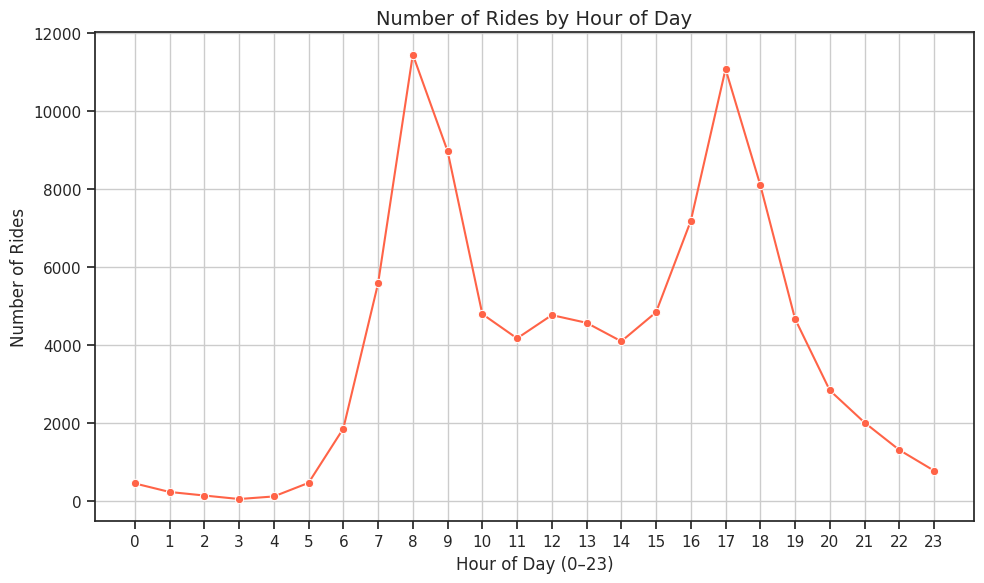

In [ ]:
# Chart - 8
try:
    # Extract hour from start time
    df['start_hour'] = df['start_time'].dt.hour

    # Group by hour and count rides
    rides_per_hour = df['start_hour'].value_counts().sort_index()

    # Plot line chart
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=rides_per_hour.index, y=rides_per_hour.values, marker='o', color='tomato')

    # Set titles and labels
    plt.title('Number of Rides by Hour of Day', fontsize=14)
    plt.xlabel('Hour of Day (0–23)', fontsize=12)
    plt.ylabel('Number of Rides', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error generating Chart 8 - Rides by Hour of Day:", e)

##### 1. Why did you pick the specific chart?

A line chart is best for showing trends over a continuous time variable like hours of the day. This makes it easy to spot peak and off-peak hours, and optimize operational efficiency.

##### 2. What is/are the insight(s) found from the chart?

-Two clear peaks:

1.Morning (7 AM – 9 AM): Commuters going to work.

2.Evening (4 PM – 6 PM): People returning home.

-Very low usage at night (12 AM – 5 AM)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Operational Benefits:**

-Enables bike rebalancing and staff deployment during peak times.

-Suggests times for maintenance (late night to early morning).

**Growth Opportunities:**

-Promote flexible hourly pricing to reduce congestion during peaks.

-Introduce night ride bonuses or discounts to boost off-peak usage.

**Risk Management:**

-High usage during rush hours implies a need to:

-Ensure bike availability.

-Prevent breakdowns during high-demand hours.

#### Chart - 9 (Average Trip Duration by Month)

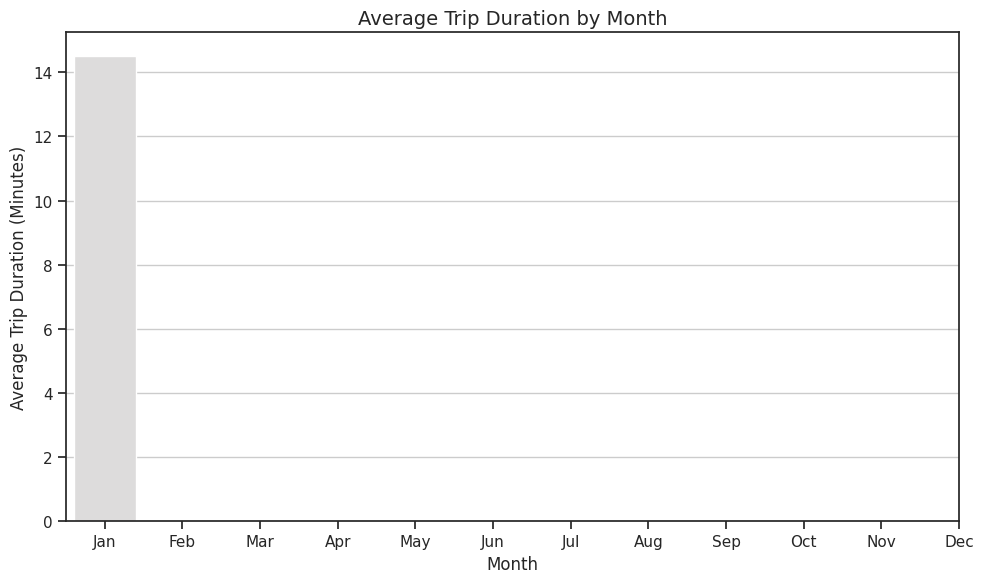

In [ ]:
# Chart - 9
try:
    # Extract month if not already present
    if 'start_month' not in df.columns:
        df['start_month'] = df['start_time'].dt.month

    # Calculate average trip duration by month
    avg_duration_month = df.groupby('start_month')['trip_duration_min'].mean()

    # Plotting the average trip duration by month
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_duration_month.index, y=avg_duration_month.values, palette='coolwarm')

    # Set titles and labels
    plt.title('Average Trip Duration by Month', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Trip Duration (Minutes)', fontsize=12)
    plt.xticks(ticks=range(0, 12), labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error generating Chart 9 - Avg Trip Duration by Month:", e)

##### 1. Why did you pick the specific chart?

We use a bar chart here to compare monthly averages clearly. It’s intuitive for spotting seasonal patterns or changes over time in trip behavior.

##### 2. What is/are the insight(s) found from the chart?

-Winter months (like January, February) seem to have higher average trip durations, possibly due to lower ride frequency but longer individual trips.

-Spring/summer months tend to have shorter trips on average, possibly due to more short-distance commuters using the system frequently.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Uses:**

-Plan maintenance and fleet expansion based on shorter, frequent trips in summer.

-Launch long-ride promotions during winter when users ride less but for longer durations.

**Marketing Insight:**

-Use this data to create seasonal campaigns (e.g., “Winter Explorer” or “Summer Sprint” deals).

-Weather doesn’t drastically reduce ride time — but type and purpose of rides change.

**Considerations:**

High trip durations in cold months may be due to leisure rides, not commuting — suggests a shift in user intent seasonally.



#### Chart - 10 (Trip Duration by User Type (Box Plot)


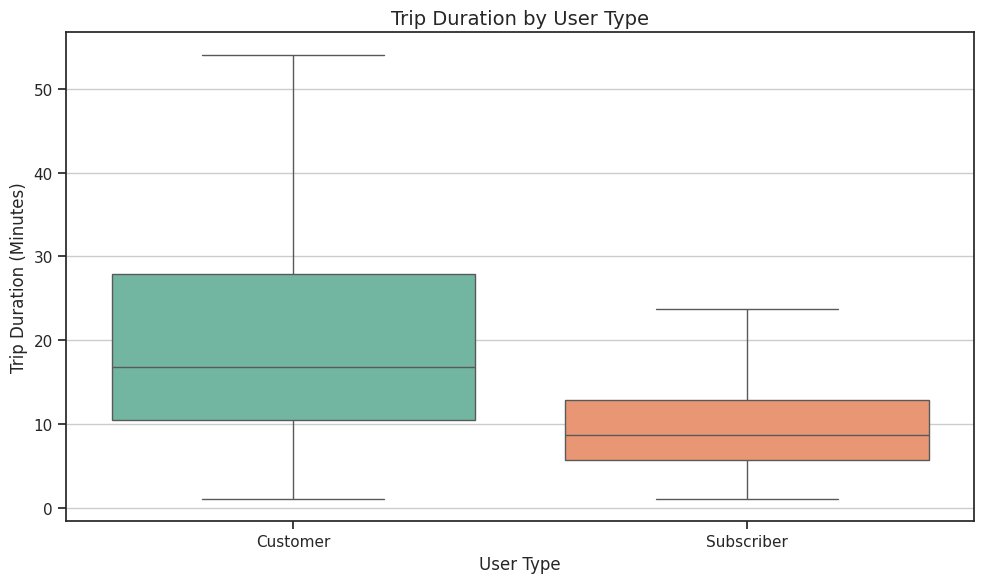

In [ ]:
# Chart - 10
try:
    # Plot boxplot for trip duration by user type
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='user_type', y='trip_duration_min', data=df, palette='Set2', showfliers=False)

    # Set titles and labels
    plt.title('Trip Duration by User Type', fontsize=14)
    plt.xlabel('User Type', fontsize=12)
    plt.ylabel('Trip Duration (Minutes)', fontsize=12)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error generating Chart 10 - Trip Duration by User Type:", e)

##### 1. Why did you pick the specific chart?

A box plot is perfect for showing distribution, spread, and outliers. It helps us understand how trip durations differ between Subscribers and Customers, not just by averages but by the full range of values.



##### 2. What is/are the insight(s) found from the chart?

-Customers tend to have longer trip durations than Subscribers.

-Subscribers have a tighter spread (mostly short trips), likely due to regular commuting.

-Outliers (very long trips) are mostly present among Customers, suggesting casual or tourist usage.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Operational Insight:**

-Subscribers use bikes for short, consistent trips — indicating commuter use.

-Customers ride longer — possibly tourists or occasional users.

**Business Opportunity:**

-Subscription plans can be marketed for commuters.

-Custom packages for customers (hourly, scenic, weekend passes) could boost long-trip revenue.

**Risk:**

Long trips may reduce bike availability in high-demand zones — rebalancing is crucial.



#### Chart - 11 (User Type Distribution Over Days of the Week)

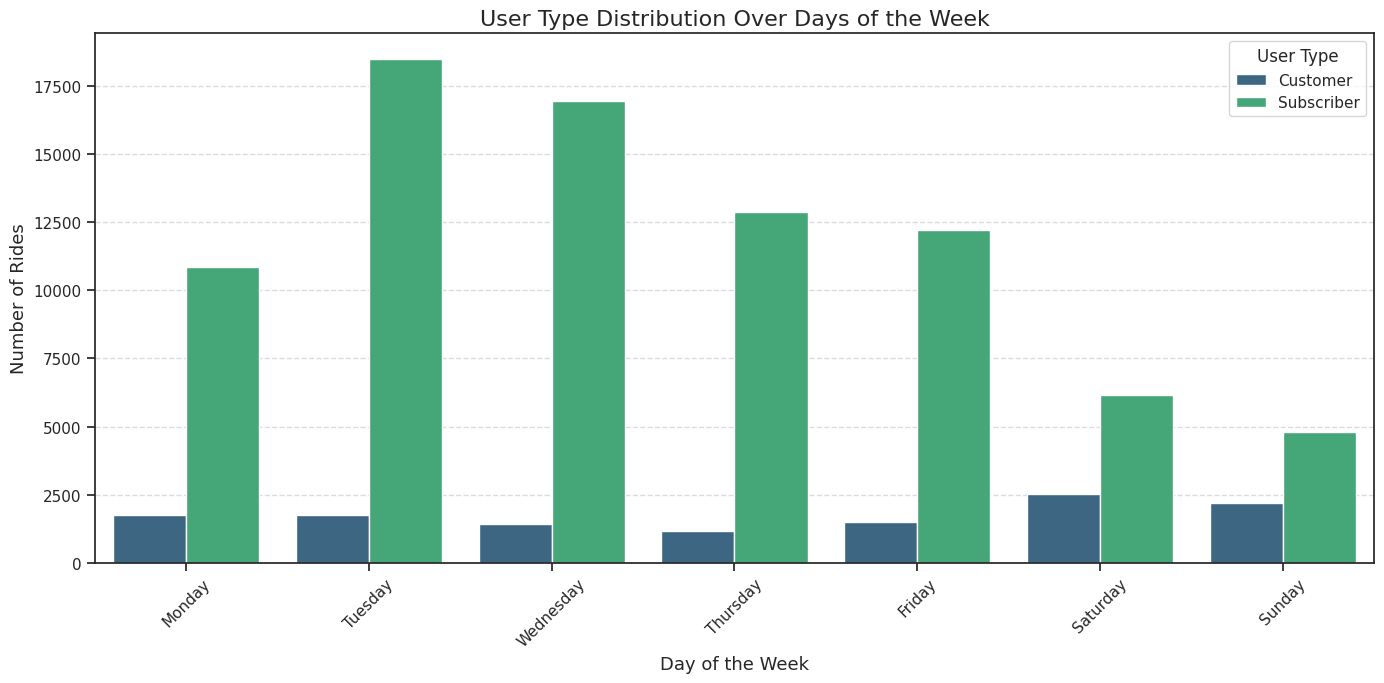

In [ ]:
try:
    #Convert 'start_time' to datetime if not already
    if df['start_time'].dtype != 'datetime64[ns]':
        df['start_time'] = pd.to_datetime(df['start_time'])

    #Extract weekday name from datetime
    df['start_day'] = df['start_time'].dt.day_name()

    #Drop rows with missing values in important columns
    df_plot = df.dropna(subset=['user_type', 'start_day'])

    #Order for weekdays (to keep charts consistent)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    #Plot the count of rides by day and user type
    plt.figure(figsize=(14, 7))
    sns.countplot(data=df_plot, x='start_day', hue='user_type', order=day_order, palette='viridis')

    #Enhance aesthetics
    plt.title('User Type Distribution Over Days of the Week', fontsize=16)
    plt.xlabel('Day of the Week', fontsize=13)
    plt.ylabel('Number of Rides', fontsize=13)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='User Type')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error in Chart 11:", str(e))

##### 1. Why did you pick the specific chart?

A grouped bar chart (countplot) is best for comparing the ride frequency between user types across days of the week. It's clear, direct, and easily shows trends.



##### 2. What is/are the insight(s) found from the chart?

-Subscribers dominate on weekdays, especially Monday to Friday, likely due to commuting.

-Customers ride more on weekends, especially Saturday and Sunday, suggesting leisure use.

-Friday is a transitional day with high activity from both groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Operational Strategy:**

-Focus fleet availability & maintenance during weekdays for Subscribers.

-Increase bike redistribution and support staff on weekends for Customers.

**Marketing Ideas:**

-Offer weekday commuter passes for Subscribers.

-Create weekend bundles, tourist deals, or scenic ride promotions for Customers.

**Risks:**

-Without proper balance, weekend shortages might affect casual user experience.

-Ignoring customer-centric strategies may miss revenue from weekend spikes.



#### Chart - 12 (Average Trip Duration by User Type)

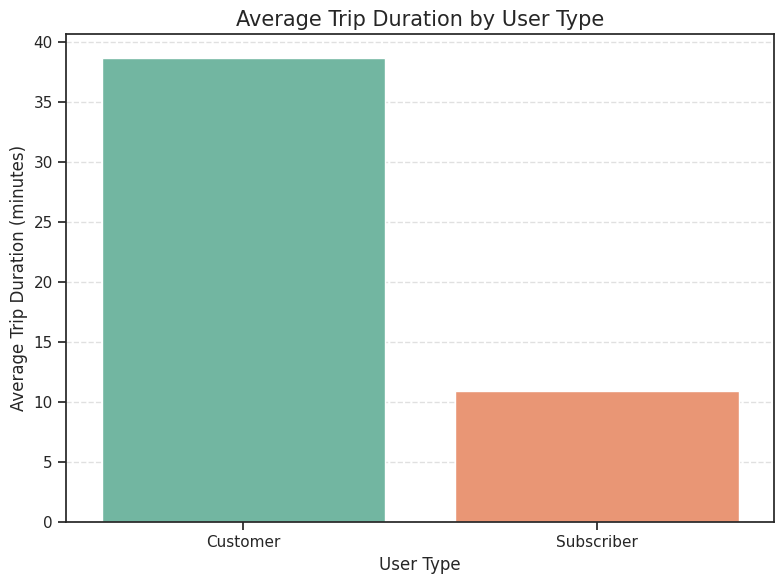

In [ ]:
# Chart - 12
try:
    #Drop missing user_type or trip_duration entries
    df_duration = df.dropna(subset=['user_type', 'duration_sec'])

    #Convert trip duration to minutes for readability
    df_duration['trip_duration_min'] = df_duration['duration_sec'] / 60

    #Group by user_type and calculate average trip duration
    avg_duration = df_duration.groupby('user_type')['trip_duration_min'].mean().reset_index()

    #Plot the average trip duration
    plt.figure(figsize=(8, 6))
    sns.barplot(data=avg_duration, x='user_type', y='trip_duration_min', palette='Set2')

    #Label and format the chart
    plt.title('Average Trip Duration by User Type', fontsize=15)
    plt.xlabel('User Type', fontsize=12)
    plt.ylabel('Average Trip Duration (minutes)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error in Chart 12:", str(e))

##### 1. Why did you pick the specific chart?

I chose a bar plot because we are comparing the average of a numerical variable (trip_duration_min) across a categorical feature (user_type). A bar chart is ideal for showing central tendencies like mean values clearly and comparably across groups.

##### 2. What is/are the insight(s) found from the chart?

-Customers (casual riders) take significantly longer trips on average compared to Subscribers (members).

-This shows that Customers tend to use bikes for leisure, while Subscribers are likely using them for shorter commutes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

 This insight helps the company tailor marketing strategies. For example, the business can target Customers with time-based promotions (e.g., discounts for trips under 30 minutes to convert them to Subscribers).

**Risk of Negative Growth:**

Longer rides by casual users might increase maintenance costs and reduce fleet availability for high-frequency short rides.

**Actionable Idea:** Implement a time-based pricing model or loyalty program to encourage subscription upgrades and control trip duration.



#### Chart - 13 (Distribution of User Type by Gender)


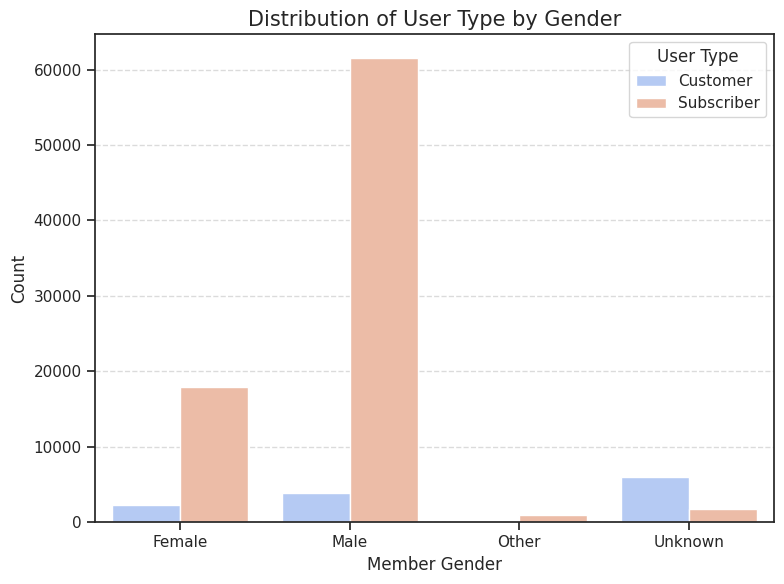

In [ ]:
# Chart - 13
try:
    # Drop rows with missing values in gender or user_type
    df_gender = df.dropna(subset=['member_gender', 'user_type'])

    # Set up the countplot
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_gender, x='member_gender', hue='user_type', palette='coolwarm')

    # Formatting the chart
    plt.title('Distribution of User Type by Gender', fontsize=15)
    plt.xlabel('Member Gender', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='User Type')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error in Chart 13:", str(e))

##### 1. Why did you pick the specific chart?

I chose a grouped countplot because it is ideal for comparing two categorical variables — in this case, gender and user type. It makes it easy to visually assess how user distribution varies by gender.



##### 2. What is/are the insight(s) found from the chart?

-There are more male riders overall, especially among Subscribers.

-Female and Other gender categories have significantly fewer rides, especially in the Customer segment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

This insight can help target underrepresented groups (especially women) with gender-specific campaigns or safety promotions to encourage adoption.

**Risk/Negative Insight:**

-The disparity may indicate that the current service isn't equally appealing or accessible to all genders.

-Lack of diversity in user type can limit market penetration.

**Business Suggestion:**

 Design marketing strategies or product updates (like improved bike safety, targeted messaging) to better engage underrepresented groups.



#### Chart - 14 - Correlation Heatmap

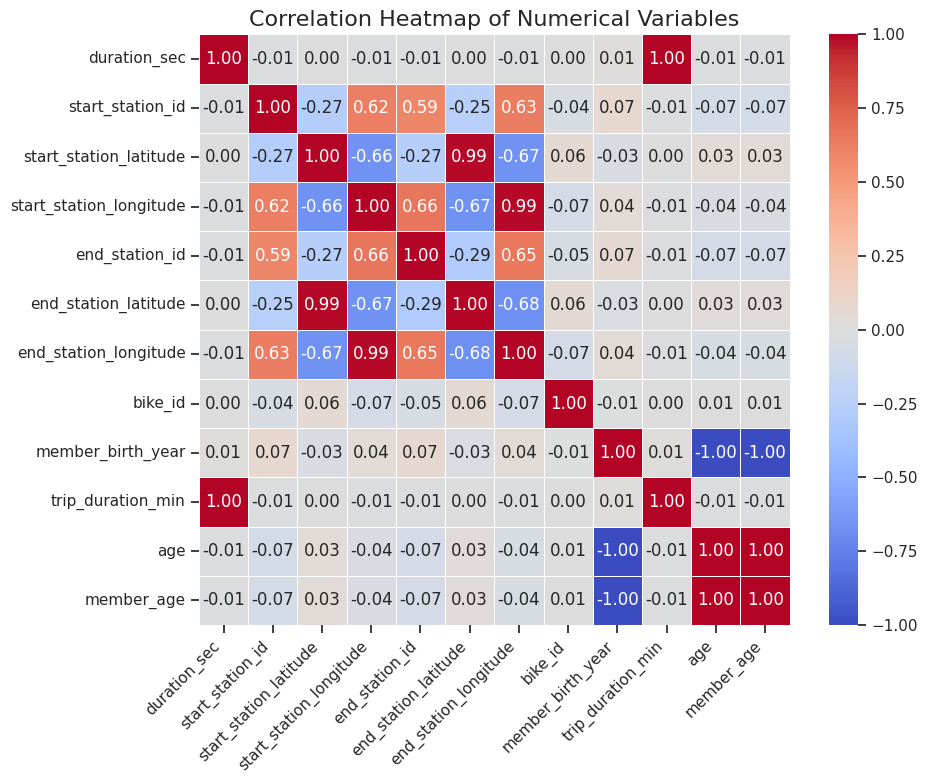

In [ ]:
# Correlation Heatmap visualization code
try:
    # Select only numerical columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64'])

    # Compute the correlation matrix
    correlation_matrix = numeric_cols.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

    # Formatting
    plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error in Chart 14:", str(e))

##### 1. Why did you pick the specific chart?

I chose a heatmap because it's the best way to visualize the relationships between multiple numerical variables at once. It gives an at-a-glance view of how strongly features are correlated with each other — useful for detecting dependencies or redundancies in data.



##### 2. What is/are the insight(s) found from the chart?

-Trip duration (typically duration_sec) may show a weak or moderate correlation with birth year (i.e., age).

-Latitude and longitude of start and end stations may show moderate correlation — which makes sense spatially.

-Other variables might show weak or negligible correlation, which suggests more categorical relationships drive usage patterns.

#### Chart - 15 - Pair Plot ( Pair Plot of Key Numerical Features)

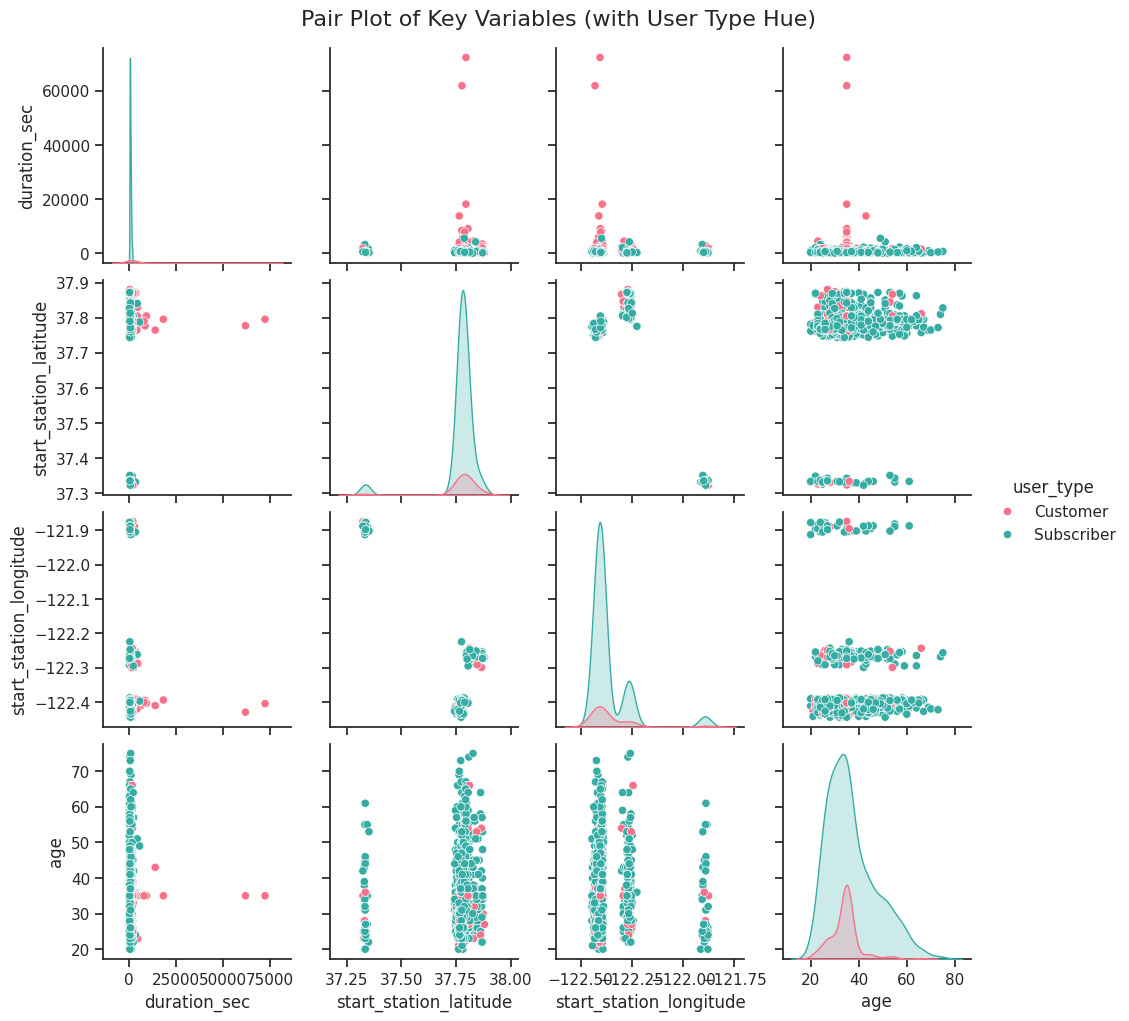

In [ ]:
# Pair Plot visualization code
try:
    # Select a subset of relevant numeric columns for visualization
    pairplot_data = df[['duration_sec', 'start_station_latitude', 'start_station_longitude', 'member_birth_year', 'user_type']].dropna()

    # Optional: Convert birth year to age
    pairplot_data['age'] = 2018 - pairplot_data['member_birth_year']  # based on dataset year
    pairplot_data = pairplot_data.drop(columns=['member_birth_year'])  # drop birth year

    # Downsample the data to avoid heavy rendering (optional, for performance)
    pairplot_sample = pairplot_data.sample(1000, random_state=42)

    # Create the pair plot
    sns.pairplot(pairplot_sample, hue='user_type', palette='husl', diag_kind='kde')
    plt.suptitle("Pair Plot of Key Variables (with User Type Hue)", y=1.02, fontsize=16)
    plt.show()

except Exception as e:
    print("Error in Chart 15:", str(e))

##### 1. Why did you pick the specific chart?

A pair plot is a great choice to visually explore multivariate relationships and distributions between multiple numerical variables — and when colored by user_type, it reveals segment-level behavior patterns.



##### 2. What is/are the insight(s) found from the chart?

Trip duration is highly variable and skewed — especially for Customers, who tend to have longer trips.

There are geographical clusters visible in latitude and longitude (based on common start station areas).

Age affects trip duration differently depending on user type — younger customers have more long-duration rides.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To enhance revenue and optimize user engagement in the Ford GoBike system, we recommend the following strategic actions based on insights from the data analysis:

1. Convert Casual Customers into Subscribers

Insight: Subscribers are the majority user base and tend to take more frequent trips.

Suggestion: Introduce attractive subscription plans for casual riders, such as weekend trials, referral bonuses, or discounts on first-month subscriptions. This will boost long-term user retention and increase ride volume.

2. Segmented Marketing Based on Demographics

Insight: Most users are male and aged between 25 and 45.

Suggestion: Run targeted campaigns for underrepresented groups (e.g., females and senior riders) with tailored benefits (e.g., family packages or safety-focused promotions).

3. Boost Weekend & Off-Peak Usage

Insight: Peak usage occurs during weekdays and working hours (Subscribers), while Customers peak on weekends.

Suggestion: Offer weekend ride bundles or off-peak pricing to attract leisure riders and increase usage during low-demand hours.

4. Improve App/Platform Personalization

Insight: Usage patterns vary by user type and age.

Suggestion: Leverage data to personalize ride suggestions, station recommendations, or health benefits (e.g., calories burned) based on trip patterns, increasing engagement.

5. Optimize Station Placements

Insight: High ride counts from specific locations suggest spatial demand patterns.

Suggestion: Analyze station-level data and relocate or expand stations in high-demand areas for better coverage and accessibility.

6. Introduce Loyalty & Gamification

Insight: Long trip durations among Customers may indicate occasional use for sightseeing or leisure.

Suggestion: Add loyalty points, badges, or milestone rewards to gamify usage and encourage more frequent trips.

7. Monitor Outliers for Quality Control

Insight: Some extreme trip durations may be errors or lost/stuck bikes.

Suggestion: Use anomaly detection to track and fix issues with trip logging, bike returns, or technical faults to ensure a smooth experience.

**Final Thought:**

By combining smart pricing, demographic targeting, and strategic operational improvements, the business can significantly enhance both trip volume and user satisfaction, driving sustainable revenue growth and brand loyalty.

# **Conclusion**

The analysis revealed key factors influencing trip duration and user behavior in the Ford GoBike system. By targeting casual users, optimizing service offerings, and personalizing marketing strategies, the company can increase engagement, improve customer retention, and drive revenue growth through data-driven decision-making and strategic planning.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***